In [1]:
from pathlib import Path
from tools.utils import read_json
from tools.config import config
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from matplotlib.font_manager import _rebuild


plt.rc('figure', figsize=(10, 5))
plt.rcParams['font.sans-serif'] = ['SimHei']
_rebuild()

/home/arias/Projects/python/jinnan_chusai_mmdet/tools/config.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  d = yaml.load(f)


In [2]:
root_dir = Path(config.data_dir)
dataset_dir = root_dir / 'dataset'
train_json_fp = dataset_dir / 'train.json'
val_json_fp = dataset_dir / 'val.json'


train_coco = COCO(train_json_fp)
val_coco = COCO(val_json_fp)


train_json = read_json(train_json_fp)
val_json = read_json(val_json_fp)
val_json.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

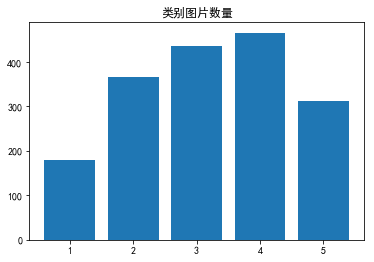

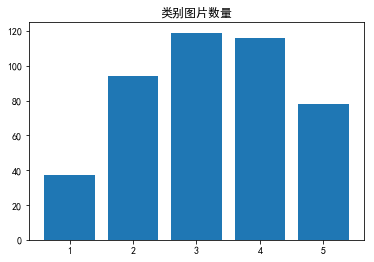

In [4]:
def stats_category_image_number(j):
    category_stats = dict()
    for item in j['annotations']:
        image_id = item['image_id']
        category_id = item['category_id']
        if not category_id in category_stats:
            category_stats[category_id] = set()
        category_stats[category_id].add(image_id)
    for category_id, image_ids in category_stats.items():
        category_stats[category_id] = len(image_ids)
    x = sorted(category_stats.keys())
    y = [category_stats[i] for i in x]
    plt.figure()
    plt.title('类别图片数量')
    plt.bar(x, y)
stats_category_image_number(train_json)
stats_category_image_number(val_json)

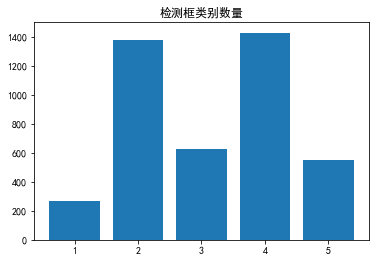

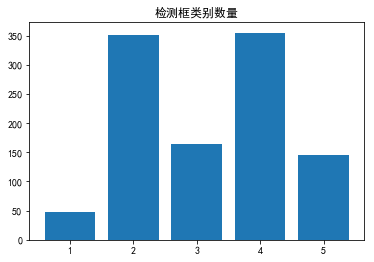

In [5]:
def stats_category_image_number(j):
    category_stats = dict()
    for item in j['annotations']:
        anno_id = item['id']
        category_id = item['category_id']
        if not category_id in category_stats:
            category_stats[category_id] = set()
        category_stats[category_id].add(anno_id)
    for category_id, anno_ids in category_stats.items():
        category_stats[category_id] = len(anno_ids)
    x = sorted(category_stats.keys())
    y = [category_stats[i] for i in x]
    plt.figure()
    plt.title('检测框类别数量')
    plt.bar(x, y)
stats_category_image_number(train_json)
stats_category_image_number(val_json)

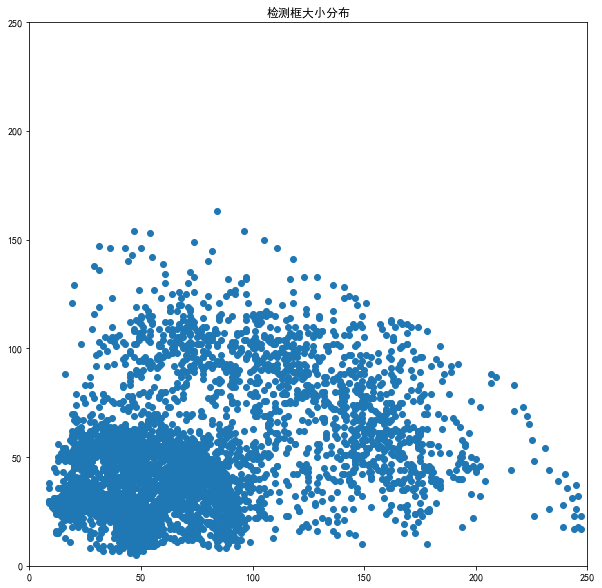

In [24]:
def plot_ann_w_h(j):
    w_list = []
    h_list = []
    for item in j['annotations']:
        x, y, w, h = item['bbox']
        w_list.append(w)
        h_list.append(h)
    plt.figure(figsize=(10, 10))
    plt.title('检测框大小分布')
    plt.scatter(w_list, h_list)
    plt.xlim(0, 250)
    plt.ylim(0, 250)

plot_ann_w_h(train_json)

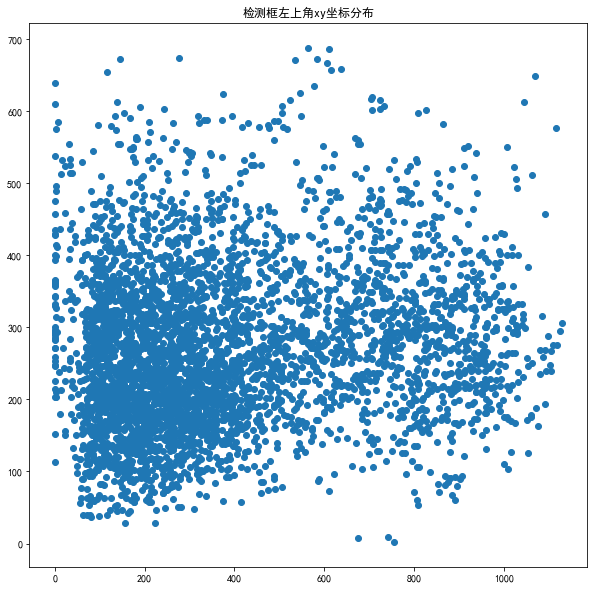

In [4]:
def plot_ann_left_top(j):
    x_list = []
    y_list = []
    for item in j['annotations']:
        x, y, w, h = item['bbox']
        x_list.append(x)
        y_list.append(y)
    plt.figure(figsize=(10, 10))
    plt.title('检测框左上角xy坐标分布')
    plt.scatter(x_list, y_list)

plot_ann_left_top(train_json)

In [25]:
train_json['images'][0
]

{'coco_url': '',
 'data_captured': '',
 'file_name': '190119_184244_00166940.jpg',
 'flickr_url': '',
 'id': 0,
 'height': 391,
 'width': 680,
 'license': 1}

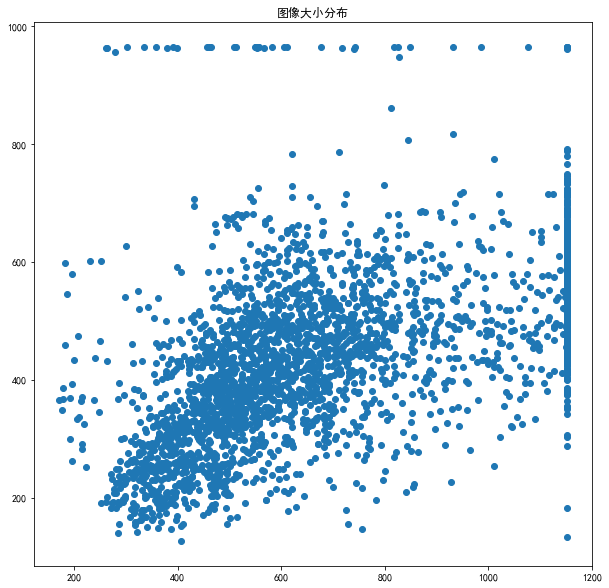

In [28]:
def plot_img_w_h(j):
    w_list = []
    h_list = []
    for item in j['images']:
        w_list.append(item['width'])
        h_list.append(item['height'])
    plt.figure(figsize=(10, 10))
    plt.title('图像大小分布')
    plt.scatter(w_list, h_list)


plot_img_w_h(train_json)

In [7]:
train_json['annotations'][0]

{'id': 1,
 'image_id': 0,
 'category_id': 3,
 'iscrowd': 0,
 'segmentation': [[88, 298, 86, 256, 203, 249, 206, 291]],
 'area': 4956,
 'bbox': [88, 253, 118, 42],
 'minAreaRect': [[88, 298], [86, 256], [203, 249], [206, 291]]}

In [12]:
def count_image_det_number(coco):
    det_nums = []
    

count_image_det_number(train_json)
count_image_det_number(val_json)

In [11]:
def check_images(j1, j2):
    j1_fns = [item['file_name'] for item in j1['images']]
    j2_fns = [item['file_name'] for item in j2['images']]
    print(len(j1_fns), len(set(j1_fns)))
    print(len(j2_fns), len(set(j2_fns)))
    print(set(j1_fns) & set(j2_fns))
    
check_images(train_json, val_json)

2817 2817
704 704
set()
